In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

import numpy as np  # linear algebra

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Color Image Processing in Python
> A hands-on guide to RGB, HSI, pseudocolor, and full-color processing  
*Run this notebook in Kaggle with OpenCV installed!*


1. Setup and Imports
First, let’s install OpenCV (if needed) and import libraries.

In [2]:
# Kaggle already has OpenCV installed, so we just import
from urllib.request import urlretrieve

import cv2
import matplotlib.pyplot as plt

In [3]:
print("OpenCV Version:", cv2.__version__)

OpenCV Version: 4.10.0


Image downloaded !


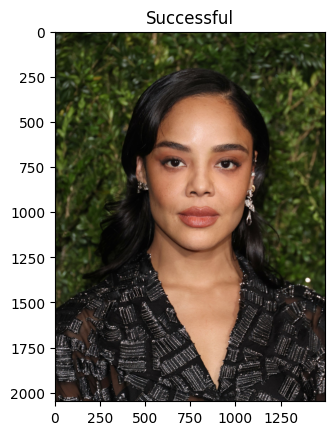

In [4]:
# Download an image reliably
image_url = "https://encrypted-tbn0.gstatic.com/licensed-image?q=tbn:ANd9GcQ6Bi4val9wA1OyrMpxQ_gufziUsXljRFcaY1Y3OfLWtkem95KIlKb27AW-G6-KszvEtoVhsnBMmMLLFSI"
image_path = "Tessa.jpg"
try:
    urlretrieve(image_url, image_path)
    print("Image downloaded !")
except Exception as e:
    print("Failed:", e)

# Load the image with error checking
img = cv2.imread(image_path)
if img is None:
    raise ValueError("Image not loaded!")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Successful")
plt.show()

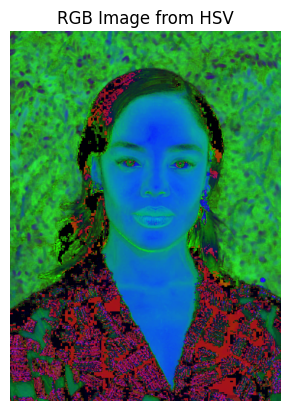

In [5]:
image = cv2.imread(image_path)

# Convert BGR to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# Convert HSV to RGB
rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

# Display
plt.imshow(hsv_image)
plt.title("RGB Image from HSV")
plt.axis("off")
plt.show()

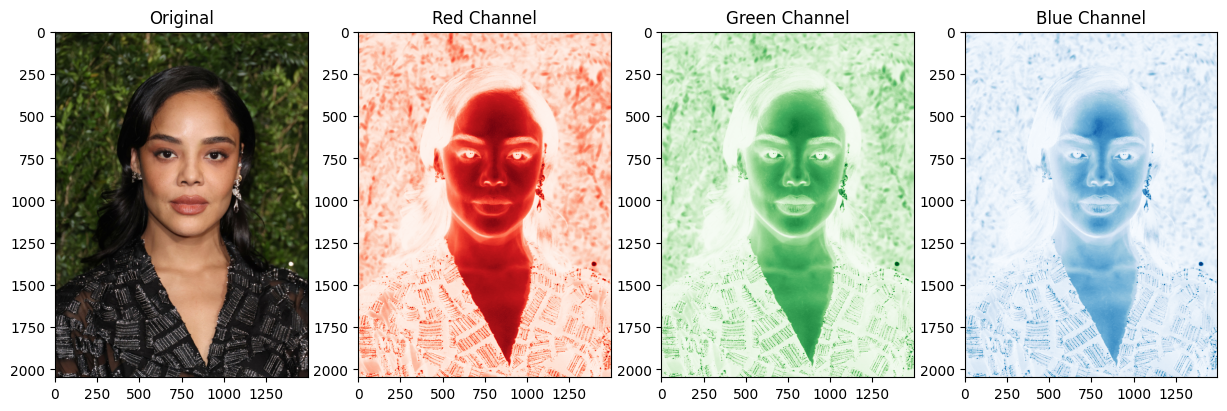

In [6]:
# Split into R, G, B channels
r, g, b = cv2.split(img_rgb)

# Display each channel
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1), plt.imshow(img_rgb), plt.title("Original")
plt.subplot(1, 4, 2), plt.imshow(r, cmap="Reds"), plt.title("Red Channel")
plt.subplot(1, 4, 3), plt.imshow(g, cmap="Greens"), plt.title("Green Channel")
plt.subplot(1, 4, 4), plt.imshow(b, cmap="Blues"), plt.title("Blue Channel")
plt.show()

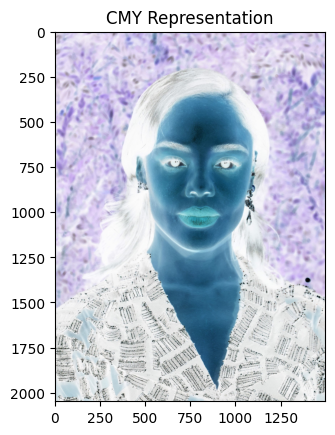

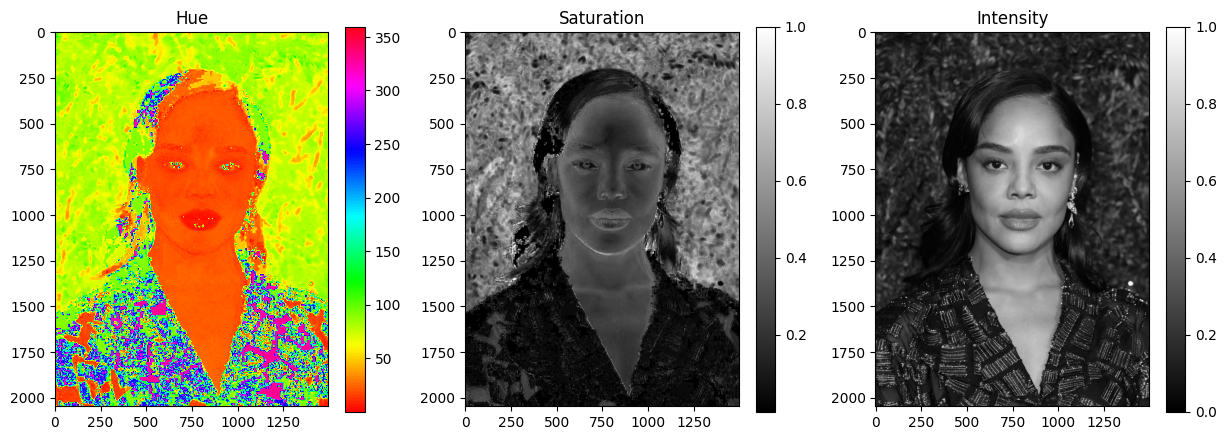

In [7]:
def rgb_to_cmy(rgb_img):
    return 255 - rgb_img

cmy_img = rgb_to_cmy(img_rgb)
plt.imshow(cmy_img)
plt.title("CMY Representation")
plt.show()


def rgb_to_hsi(rgb_img):
    img = rgb_img.astype(float) / 255.0
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]

    # Intensity
    I = np.mean(img, axis=2)

    # Saturation
    min_rgb = np.min(img, axis=2)
    S = 1 - (min_rgb / (I + 1e-6))

    # Hue
    numerator = 0.5 * ((r - g) + (r - b))
    denominator = np.sqrt((r - g)**2 + (r - b) * (g - b)) + 1e-6
    theta = np.arccos(numerator / denominator)
    H = np.where(b <= g, theta, 2 * np.pi - theta)
    H = np.degrees(H)  # Convert to degrees

    return H, S, I

H, S, I = rgb_to_hsi(img_rgb)

# Plot HSI components
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(H, cmap="hsv"), plt.title("Hue"), plt.colorbar()
plt.subplot(1, 3, 2), plt.imshow(S, cmap="gray"), plt.title("Saturation"), plt.colorbar()
plt.subplot(1, 3, 3), plt.imshow(I, cmap="gray"), plt.title("Intensity"), plt.colorbar()
plt.show()

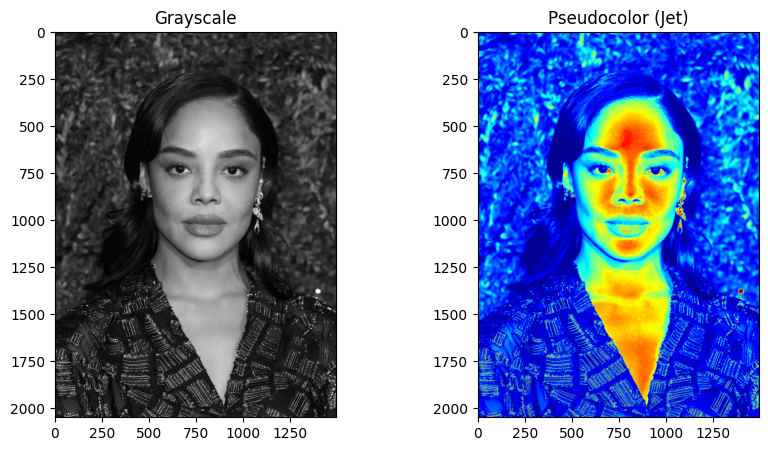

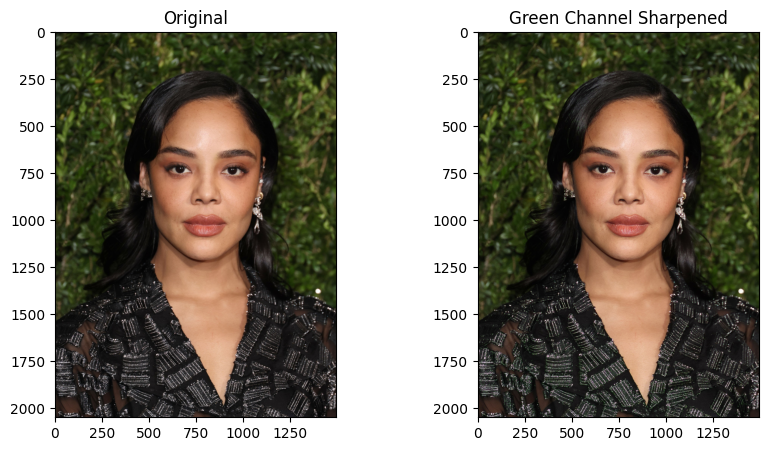

In [8]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Jet colormap (like thermal imaging)
pseudocolor = cv2.applyColorMap(gray, cv2.COLORMAP_JET)
pseudocolor_rgb = cv2.cvtColor(pseudocolor, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(gray, cmap="gray"), plt.title("Grayscale")
plt.subplot(1, 2, 2), plt.imshow(pseudocolor_rgb), plt.title("Pseudocolor (Jet)")
plt.show()


kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Sharpen Green channel
g_sharp = cv2.filter2D(g, -1, kernel)

# Merge back
sharpened = cv2.merge([r, g_sharp, b])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img_rgb), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(sharpened), plt.title("Green Channel Sharpened")
plt.show()



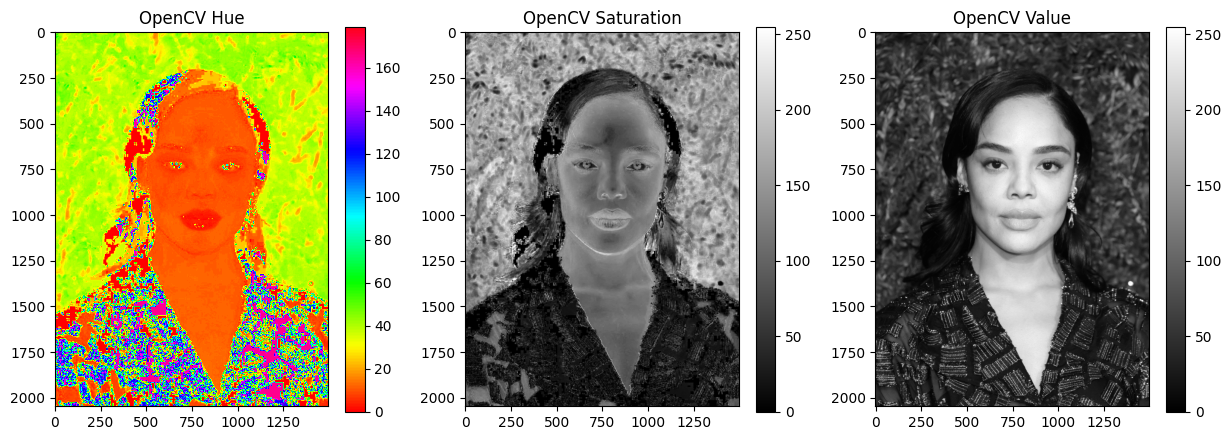

In [9]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(h, cmap="hsv"), plt.title("OpenCV Hue"), plt.colorbar()
plt.subplot(1, 3, 2), plt.imshow(s, cmap="gray"), plt.title("OpenCV Saturation"), plt.colorbar()
plt.subplot(1, 3, 3), plt.imshow(v, cmap="gray"), plt.title("OpenCV Value"), plt.colorbar()
plt.show()
